In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import time

In [2]:
start_time = time.time()

In [3]:
#grid size NxN
#start (0,0), finish at (N-1,N-1)
N = 5
goal = (N-1,N-1)

In [4]:
#actions : up, down, right, left, nothing
actions = {"up" : (1,0), "dwn" : (-1,0), "rght": (0,1), "lft" : (0,-1), "nthng" :(0,0)}

In [5]:
def BellmanOp(x, u, actions_set = actions): #Bellman operator
    values = {"max" : -np.inf, "argmax" : []}
    for a in actions_set:
        s = tuple(map(sum, zip(x, actions_set[a]))) #new state (s=x+a) by action a
        
        if s[0] < 0 or s[0] > N-1 or s[1] < 0 or s[1] > N-1: #check if new state s is out of bounds
            continue
        else:
            if x == goal and a == "nthng": #reward function
                B = 1 + g*u[s]

                if values["max"] == B:
                    values["argmax"].append(a)

                elif values["max"] < B:
                    values["max"] = B
                    values["argmax"] = [a]
            
            else:
                B = g*u[s]

                if values["max"] == B:
                    values["argmax"].append(a)

                elif values["max"] < B:
                    values["max"] = B
                    values["argmax"] = [a]
    return values

In [6]:
def GraphResults(u, politic):
    actions_symbols = {"up" : "↑", "dwn" : "↓", "rght": "→", "lft" : "←", "nthng" : "↻"}
    float_formatter = "{:.2f}".format
    
    fig, ax = plt.subplots()
    im = ax.matshow(np.full((N,N), 255, dtype=np.float32), origin='lower', cmap='gray', vmin=0, vmax=255)
    for i in range(0,N):
        for r in range(0,N):
            index = np.ravel_multi_index((i,r), (N,N))
            for a in politic[index]:
                if a == "up":
                    ax.text(r,i, actions_symbols[a], va="baseline", ha="center", fontsize="xx-large")
                elif a == "rght":
                    ax.text(r,i, actions_symbols[a], va="center", ha="left", fontsize="xx-large")
                else:
                    ax.text(r,i, actions_symbols[a], va="baseline", ha="center", fontsize="xx-large")
                    
            ax.text(r,i-0.25 , float_formatter(u[i,r]), va="top", ha="right")
                
    plt.hlines(y=np.arange(0, N)+0.5, xmin=np.full(N, 0)-0.5, xmax=np.full(N, N)-0.5, color="black", linewidth=1)
    plt.vlines(x=np.arange(0, N)+0.5, ymin=np.full(N, 0)-0.5, ymax=np.full(N, N)-0.5, color="black", linewidth=1)
    
    fig.tight_layout()
    #plt.savefig('gridworld_solved.png', dpi=300)
    plt.show()

In [7]:
vn = np.zeros((N,N)) #start v0 as an array of zeroes
vni = np.zeros((N, N))
decision_grid = []

iterations = 1

e = 0.15 #epsilon
g = 0.80 #gamma

In [8]:
#first iteration
for i in range(0,N):
    for r in range(0,N): #state x = (i,j)
        values = BellmanOp((i,r), vn)
        vni[i,r] = values["max"]
        decision_grid.append(values["argmax"])

In [9]:
while distance.chebyshev(np.ravel(vni), np.ravel(vn)) >= e*(1-g)/(2*g):
    vn = np.copy(vni)
    decision_grid = []
    for i in range(0,N):
        for r in range(0,N): #state x = (i,j)
            values = BellmanOp((i,r), vn)
            vni[i,r] = values["max"]
            decision_grid.append(values["argmax"])
            
    iterations += 1

In [10]:
print(time.time() - start_time) #time needed for running the notebook

0.06999063491821289


In [11]:
print("Number of iterations: ", iterations)

Number of iterations:  19


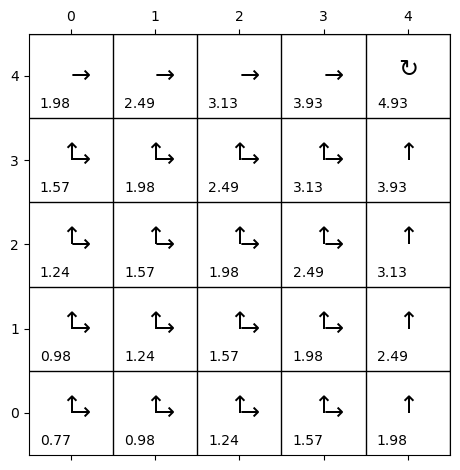

In [12]:
GraphResults(vni,decision_grid)

In [13]:
position = (0,0) #initial position
grid = np.zeros((N,N))
grid[position] = 1

In [14]:
#following decision rule from the initial position
while position != (4,4):
    index = np.ravel_multi_index(position, (N,N))
    a_id = np.random.choice(len(decision_grid[index]))
    position = tuple(map(sum, zip(position, actions[decision_grid[index][a_id]]))) #take action a
    grid[position] = 1

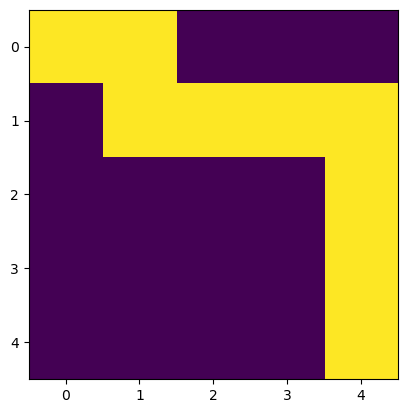

In [15]:
plt.imshow(grid)